In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [4]:
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/Users/akang/Documents/capstone/no_summaries_cleaned_modeling_features.csv')

In [3]:
df.head()

,casestatus,casecategory,countyofoffense,county,dv_flag,juvflag,conv_flag,charge,title,section,...,avg_charge_severity,std_charge_severity,range_charge_severity,num_charges_case,num_charges_individual,offense_year,prev_recid_flag,multi_charge_flag,offense_type_intensity,has_prior_offense
0,Closed,Court Case,Venango,Venango,0,0,0,182709A7,18.0,2709,...,2.0,0.0,0,1,1,2017,0,0,0,0
1,Closed,Court Case,Monroe,Monroe,0,0,0,"185902A1, 185503A4, CC5902A1, CC5503A4",18,"5503, 5902",...,2.0,0.0,0,4,4,2014,0,1,0,0
2,Closed,Court Case,Fayette,Fayette,0,0,0,"182701A1, 182709A1, 182709",18.0,"2701, 2709",...,2.0,1.0,2,3,3,2017,0,1,1,0
3,Closed,Court Case,Cumberland,Cumberland,0,0,0,"753802A1, 753802B",75,"1543, 3802",...,1.5,0.5,1,2,2,2017,0,1,0,0
4,Closed,Court Case,Cumberland,Cumberland,0,0,0,"751543A, 753802A1",75,"3802, 1543",...,1.5,0.5,1,2,4,2018,1,1,0,1


In [5]:
X = df.drop(columns=['pretrial_recidivism'])
y = df['pretrial_recidivism'].astype(int)

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Handle missing values
for col in numerical_cols:
    if X[col].isna().sum() > 0:
        X[col].fillna(X[col].median(), inplace=True)

for col in categorical_cols:
    if X[col].isna().sum() > 0:
        X[col].fillna('Unknown', inplace=True)

# Encode categorical variables
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}\n")

Train set size: 345536
Test set size: 86384



In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/opt/anaconda3/lib/python3.13/site-packages/skl

LogisticRegression(class_weight='balanced', max_iter=1000)

In [10]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.6438229301722541

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74     66253
           1       0.34      0.55      0.42     20131

    accuracy                           0.64     86384
   macro avg       0.59      0.61      0.58     86384
weighted avg       0.72      0.64      0.67     86384


Confusion Matrix:
 [[44481 21772]
 [ 8996 11135]]


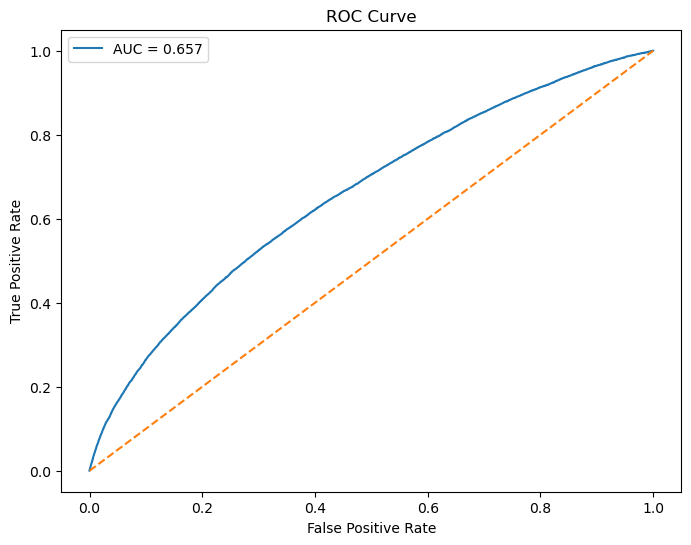

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [14]:
coeffs = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_reg.coef_[0]
}).sort_values(by='coefficient', ascending=False)

print(coeffs)

                    feature  coefficient
2           countyofoffense     0.351485
31        has_prior_offense     0.235335
28          prev_recid_flag     0.201239
19            property_flag     0.172001
22      avg_charge_severity     0.165667
26   num_charges_individual     0.077615
30   offense_type_intensity     0.060058
17                drug_flag     0.041318
12                 citation     0.039393
8                     title     0.038164
11                  grade_x     0.032047
23      std_charge_severity     0.013642
10               subsection     0.007586
1              casecategory     0.007125
0                casestatus     0.003438
6                 conv_flag     0.000000
4                   dv_flag     0.000000
5                   juvflag     0.000000
29        multi_charge_flag    -0.001920
25         num_charges_case    -0.004118
24    range_charge_severity    -0.015386
9                   section    -0.018969
15                age_group    -0.022425
13  citationcomp

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                    feature          VIF
0                casestatus  1320.827415
1              casecategory     1.034135
2           countyofoffense    25.675250
3                    county    26.070699
4                   dv_flag          NaN
5                   juvflag          NaN
6                 conv_flag          NaN
7                    charge    11.640008
8                     title     6.975913
9                   section    12.217183
10               subsection     4.485695
11                  grade_x    14.499833
12                 citation    25.820028
13  citationcomplaintnumber     4.203562
14           age_at_offense    10.726106
15                age_group     2.215203
16  days_since_last_offense     1.590524
17                drug_flag          inf
18             violent_flag          inf
19            property_flag          inf
20      max_charge_severity          inf
21      min_charge_severity          inf
22      avg_charge_severity   644.114871
23      std_char